<a href="https://colab.research.google.com/github/imranahmed123/datascience-ai-ml/blob/main/M7_NB_MiniProject_3_Complex_Analytics_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Complex Analytics using Pyspark

## Problem Statement

Perform complex analytics on a network intrusion dataset using Pyspark

## Learning Objectives

At the end of the mini-project, you will be able to :

* analyze the data using Pyspark
* implement RDD based operations on the data
* derive insights from the complex data

### Dataset

The dataset chosen for this mini-project is a [10% subset](https://www.kdd.org/kdd-cup/view/kdd-cup-1999/Data) of the **[KDD Cup 1999 dataset](http://kdd.ics.uci.edu/databases/kddcup99/task.html)** (Computer network intrusion detection). This is the dataset used for the Third International Knowledge Discovery and Data Mining Tools Competition. The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between ``bad`` connections, called intrusions or attacks, and ``good`` normal connections. This database contains a standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment.

## Information

Since 1999, KDD’99 has been the most widely used data set for the evaluation of anomaly detection methods. This data set is prepared by S. J. Stolfo and is built based on the data captured in DARPA’98 IDS evaluation program. DARPA’98 is about 4 gigabytes of compressed raw (binary) tcpdump data of 7 weeks of network traffic, which can be processed into about 5 million connection
records, each with about 100 bytes. KDD dataset consists of approximately 4,900,000 single connection vectors each of which contains 41 features and is labeled as either normal or an attack, with exactly one specific attack type. The simulated attacks fall into one of the following four categories:

* Denial of Service Attack (DoS): making some computing or memory resources too busy so that they deny legitimate users access to these resources.
* User to Root Attack (U2R): unauthorized access from a remote machine according to exploit machine's vulnerabilities.
* Remote to Local Attack (R2L): unauthorized access to local super user (root) privileges using system's susceptibility.
* Probing Attack: host and port scans as precursors to other attacks. An attacker scans a network to gather information or find known vulnerabilities.

KDD’99 features can be classified into three groups:

1) Basic features: this category encapsulates all the attributes that can be extracted from a TCP/IP connection. Most of these features leading to an implicit delay in detection.

2) Traffic features: this category includes features that are computed with respect to a window interval and is divided into two groups:

  * "same host" features

  * "same service" features

3) Content features: unlike most of the DoS and Probing attacks, the R2L and U2R attacks don’t have any intrusion frequent sequential patterns. This is because the DoS and Probing attacks involve many connections to some host(s) in a very short period of time, however the R2L and U2R attacks are embedded in the data portions of the packets, and normally involve only a single connection. To detect these kinds of attacks, we need some features to be able to look for suspicious behavior in the data portion, e.g., the number of failed login attempts. These features are called content features.

## Grading = 10 Points

In [3]:
#@title Install packages and Download Dataset
!pip -qq install pyspark
# Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/kddcup.data_10_percent.gz
# Download feature names
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/kddcup.names
print("Successfully Installed packages and downloaded datasets!")

Successfully Installed packages and downloaded datasets!


### Create Spark Session and load the data (1 point)

#### Import required packages

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql.functions import *
from pyspark.mllib.stat import Statistics
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from operator import add

#### Create a Spark session

A Spark session is a combined entry point of a Spark application, which came into implementation from Spark 2.0 (Instead of having various contexts, everything is encapsulated in a Spark session)

In [5]:
# Start spark session
# YOUR CODE HERE
# Start spark session
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("KDD_Cup_Analysis").getOrCreate()

#### Creating an RDD from a File

The most common way of creating an RDD is to load it from a file. Notice that Spark's textFile can handle compressed files directly.

In [6]:
# YOUR CODE HERE to access sparkContext from sparkSession instance.
sc = spark.sparkContext

Load the dataset and show the top 10 records

Hint: sparkContext.textFile()

In [7]:
filePath = "/content/kddcup.data_10_percent.gz"
# YOUR CODE HERE

from pyspark.sql.types import StructType, StructField, StringType
filePath = "./kddcup.data_10_percent.gz"
# Reading the dataset
data_rdd = sc.textFile(filePath)
# Display first 5 rows
data_rdd.take(5)

# Show top 10 records
top_10_records = data_rdd.take(10)

# Print results
for record in top_10_records:
    print(record)


0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,69,1.00,0.00,1.00,0

### RDD Basic Operations (4 points)

#### Convert the data to CSV format (list of elements).

To create a Dataframe using the RDD file, convert each row into a list by splitting with a comma (,)

Hint: `map()` and `split()`

In [8]:
# YOUR CODE HERE
from pyspark.sql import SparkSession

# Start a Spark session
spark = SparkSession.builder.appName("KDD_Cup_Analysis").getOrCreate()

# Access SparkContext
sc = spark.sparkContext

# Load the dataset
file_path = "kddcup.data_10_percent.gz"

# Read as RDD
data_rdd = sc.textFile(file_path)

# Convert each row into a list by splitting with a comma
csv_rdd = data_rdd.map(lambda row: row.split(","))

# Show top 10 records in list format
top_10_csv_records = csv_rdd.take(10)

# Print results
for record in top_10_csv_records:
    print(record)


['0', 'tcp', 'http', 'SF', '181', '5450', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '9', '9', '1.00', '0.00', '0.11', '0.00', '0.00', '0.00', '0.00', '0.00', 'normal.']
['0', 'tcp', 'http', 'SF', '239', '486', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '19', '19', '1.00', '0.00', '0.05', '0.00', '0.00', '0.00', '0.00', '0.00', 'normal.']
['0', 'tcp', 'http', 'SF', '235', '1337', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '8', '8', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00', '0.00', '29', '29', '1.00', '0.00', '0.03', '0.00', '0.00', '0.00', '0.00', '0.00', 'normal.']
['0', 'tcp', 'http', 'SF', '219', '1337', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '6', '6', '0.00', '0.00', '0.00', '0.00', '1.00', '0.00'

Count how many interactions are normal and attacked in the dataset.

Hint: apply `filter` on each row, except the rows with 'normal.', all the remaining values are attacked.

In [9]:
# YOUR CODE HERE

# Filter normal and attack interactions
normal_count = csv_rdd.filter(lambda row: row[-1] == "normal.").count()
attack_count = csv_rdd.filter(lambda row: row[-1] != "normal.").count()

# Print results
print(f"Normal Interactions: {normal_count}")
print(f"Attacked Interactions: {attack_count}")

Normal Interactions: 97278
Attacked Interactions: 396743


#### Protocol and Service combinations using Cartesian product

We can compute the Cartesian product between two RDDs by using the Cartesian transformation. It returns all possible pairs of elements between two RDDs. In our case, we will use it to generate all the possible combinations between Service and Protocol in our network interactions.

First of all, isolate each collection of values in two separate RDDs. For that use `distinct` on the CSV-parsed dataset. From the dataset description, we know that protocol is the second column and service is the third.

In [11]:
# YOUR CODE HERE

from pyspark.sql import SparkSession

# Start a Spark session
spark = SparkSession.builder.appName("KDD_Cup_Analysis").getOrCreate()

# Access SparkContext
sc = spark.sparkContext

# Load the dataset
file_path = "kddcup.data_10_percent.gz"

# Read as RDD
data_rdd = sc.textFile(file_path)

# Convert each row into a list by splitting with a comma
csv_rdd = data_rdd.map(lambda row: row.split(","))

# Isolate protocol (column index 1) and service (column index 2) as separate RDDs
protocol_rdd = csv_rdd.map(lambda row: row[1]).distinct()
service_rdd = csv_rdd.map(lambda row: row[2]).distinct()




Now let's do the Cartesian product

Hint: [Cartesian](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.RDD.cartesian.html#:~:text=Return%20the%20Cartesian%20product%20of,and%20b%20is%20in%20other%20.)

In [12]:
# YOUR CODE HERE
# Compute Cartesian product
protocol_service_combinations = protocol_rdd.cartesian(service_rdd)

# Collect and display the first 10 combinations
top_10_combinations = protocol_service_combinations.take(10)

# Print results
for combination in top_10_combinations:
    print(combination)

('tcp', 'http')
('tcp', 'smtp')
('tcp', 'finger')
('tcp', 'domain_u')
('tcp', 'auth')
('tcp', 'telnet')
('tcp', 'ftp')
('tcp', 'eco_i')
('tcp', 'ntp_u')
('tcp', 'ecr_i')


#### Inspecting interaction duration

select the total duration of interactions for normal and attack intrusion types.
* Use the above filtered normal and attacked data and convert the duration column to integer type using `map()`
* get the sum of duration by applying `reduce` on both the data using add operator
* find the mean of duration by dividing the sum with count

Hint: [reduce()](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.RDD.reduce.html)

In [13]:
# YOUR CODE HERE

from pyspark.sql import SparkSession
from operator import add

# Start a Spark session
spark = SparkSession.builder.appName("KDD_Cup_Analysis").getOrCreate()

# Access SparkContext
sc = spark.sparkContext

# Load the dataset
file_path = "kddcup.data_10_percent.gz"

# Read as RDD
data_rdd = sc.textFile(file_path)

# Convert each row into a list by splitting with a comma
csv_rdd = data_rdd.map(lambda row: row.split(","))

# Filter normal and attack interactions
normal_rdd = csv_rdd.filter(lambda row: row[-1] == "normal.")
attack_rdd = csv_rdd.filter(lambda row: row[-1] != "normal.")

In [14]:
# YOUR CODE HERE
# Convert the duration column (index 0) to integer
normal_durations = normal_rdd.map(lambda row: int(row[0]))
attack_durations = attack_rdd.map(lambda row: int(row[0]))

# Calculate total duration using reduce()
total_normal_duration = normal_durations.reduce(add)
total_attack_duration = attack_durations.reduce(add)


In [15]:
# YOUR CODE HERE
# Calculate count of interactions
normal_count = normal_rdd.count()
attack_count = attack_rdd.count()

# Calculate mean duration
mean_normal_duration = total_normal_duration / normal_count if normal_count > 0 else 0
mean_attack_duration = total_attack_duration / attack_count if attack_count > 0 else 0

# Print results
print(f"Total Normal Duration: {total_normal_duration}")
print(f"Mean Normal Duration: {mean_normal_duration}")
print(f"Total Attack Duration: {total_attack_duration}")
print(f"Mean Attack Duration: {mean_attack_duration}")

Total Normal Duration: 21075991
Mean Normal Duration: 216.65732231336992
Total Attack Duration: 2626792
Mean Attack Duration: 6.620890601724542


#### Data aggregation with key/value pair RDDs

We can use all the transformations and actions available for normal RDDs with key/value pair RDDs. We just need to make the functions work with pair elements.

* create a key/value pair of intrusion type and duration
* calculate the total duration of each intrusion type using `reduceByKey()`

In [16]:
# YOUR CODE HERE

from pyspark.sql import SparkSession
from operator import add

# Start a Spark session
spark = SparkSession.builder.appName("KDD_Cup_Analysis").getOrCreate()

# Access SparkContext
sc = spark.sparkContext

# Load the dataset
file_path = "kddcup.data_10_percent.gz"

# Read as RDD
data_rdd = sc.textFile(file_path)

# Convert each row into a list by splitting with a comma
csv_rdd = data_rdd.map(lambda row: row.split(","))

# Create a key-value RDD where key = intrusion type, value = duration
key_value_rdd = csv_rdd.map(lambda row: (row[-1], int(row[0])))

# Calculate total duration for each intrusion type using reduceByKey()
intrusion_duration_rdd = key_value_rdd.reduceByKey(add)

# Collect results
intrusion_duration_results = intrusion_duration_rdd.collect()

# Print results
for intrusion_type, total_duration in intrusion_duration_results:
    print(f"Intrusion Type: {intrusion_type}, Total Duration: {total_duration}")


Intrusion Type: normal., Total Duration: 21075991
Intrusion Type: buffer_overflow., Total Duration: 2751
Intrusion Type: loadmodule., Total Duration: 326
Intrusion Type: perl., Total Duration: 124
Intrusion Type: neptune., Total Duration: 0
Intrusion Type: smurf., Total Duration: 0
Intrusion Type: guess_passwd., Total Duration: 144
Intrusion Type: pod., Total Duration: 0
Intrusion Type: teardrop., Total Duration: 0
Intrusion Type: portsweep., Total Duration: 1991911
Intrusion Type: ipsweep., Total Duration: 43
Intrusion Type: land., Total Duration: 0
Intrusion Type: ftp_write., Total Duration: 259
Intrusion Type: back., Total Duration: 284
Intrusion Type: imap., Total Duration: 72
Intrusion Type: satan., Total Duration: 64
Intrusion Type: phf., Total Duration: 18
Intrusion Type: nmap., Total Duration: 0
Intrusion Type: multihop., Total Duration: 1288
Intrusion Type: warezmaster., Total Duration: 301
Intrusion Type: warezclient., Total Duration: 627563
Intrusion Type: spy., Total Durati

### Create a DataFrame with the header as features (2 points)

* Read the features (*kddcup.names*) and preprocess.

    Hints:
    - Each feature description appears row-wise in *kddcup.names*
    - The first row consists of distinct values of intrusion_types
    - Add or move the *intrusion_types* column name to the last, to align with the data.
    - Each feature is represented as *feature_name*: *type*, remove *type* after colon (:)

In [17]:
# YOUR CODE HERE
from pyspark.sql import SparkSession

# Start a Spark session
spark = SparkSession.builder.appName("KDD_Cup_Analysis").getOrCreate()

# Access SparkContext
sc = spark.sparkContext

# Load dataset files
names_file_path = "kddcup.names"
data_file_path = "kddcup.data_10_percent.gz"

# Read the kddcup.names file as an RDD
names_rdd = sc.textFile(names_file_path)

# Convert RDD to a list for processing
names_list = names_rdd.collect()

# Extract feature names by removing types (after the colon)
feature_names = [line.split(":")[0] for line in names_list[1:]]  # Skipping first row

# Extract intrusion types from the first row
intrusion_types = names_list[0]

# Append 'intrusion_types' column name at the end to align with the data
feature_names.append("intrusion_types")

# Read the data file as an RDD
data_rdd = sc.textFile(data_file_path)

# Convert each row into a list by splitting with a comma
csv_rdd = data_rdd.map(lambda row: row.split(","))

# Create a DataFrame from the RDD with extracted feature names
df = spark.createDataFrame(csv_rdd, schema=feature_names)

# Show the first few rows
df.show(10)


+--------+-------------+-------+----+---------+---------+----+--------------+------+---+-----------------+---------+---------------+----------+------------+--------+------------------+----------+----------------+-----------------+-------------+--------------+-----+---------+-----------+---------------+-----------+---------------+-------------+-------------+------------------+--------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+---------------+
|duration|protocol_type|service|flag|src_bytes|dst_bytes|land|wrong_fragment|urgent|hot|num_failed_logins|logged_in|num_compromised|root_shell|su_attempted|num_root|num_file_creations|num_shells|num_access_files|num_outbound_cmds|is_host_login|is_guest_login|count|srv_count|serror_rate|srv_serror_rate|rerror_rate|srv_rerror_rate|same_srv_rate|diff_srv_rate|srv_diff_host_rate

* Create a dataframe with the data and headers as preprocessed feature names

In [18]:
# YOUR CODE HERE

from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType

# Start a Spark session
spark = SparkSession.builder.appName("KDD_Cup_Analysis").getOrCreate()

# Access SparkContext
sc = spark.sparkContext

# Load dataset files
names_file_path = "kddcup.names"
data_file_path = "kddcup.data_10_percent.gz"

# Read the kddcup.names file as an RDD
names_rdd = sc.textFile(names_file_path)

# Convert RDD to a list for processing
names_list = names_rdd.collect()

# Extract feature names by removing types (after the colon)
feature_names = [line.split(":")[0] for line in names_list[1:]]  # Skipping first row

# Append 'intrusion_types' column name at the end to align with the data
feature_names.append("intrusion_types")

# Read the data file as an RDD
data_rdd = sc.textFile(data_file_path)

# Convert each row into a list by splitting with a comma
csv_rdd = data_rdd.map(lambda row: row.split(","))

# Define schema for DataFrame (all fields as StringType initially)
schema = StructType([StructField(name, StringType(), True) for name in feature_names])

# Create a DataFrame from the RDD with extracted feature names
df = spark.createDataFrame(csv_rdd, schema=schema)

# Show the first few rows
df.show(10)


+--------+-------------+-------+----+---------+---------+----+--------------+------+---+-----------------+---------+---------------+----------+------------+--------+------------------+----------+----------------+-----------------+-------------+--------------+-----+---------+-----------+---------------+-----------+---------------+-------------+-------------+------------------+--------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+---------------+
|duration|protocol_type|service|flag|src_bytes|dst_bytes|land|wrong_fragment|urgent|hot|num_failed_logins|logged_in|num_compromised|root_shell|su_attempted|num_root|num_file_creations|num_shells|num_access_files|num_outbound_cmds|is_host_login|is_guest_login|count|srv_count|serror_rate|srv_serror_rate|rerror_rate|srv_rerror_rate|same_srv_rate|diff_srv_rate|srv_diff_host_rate

#### What is the count of each protocol type?

Hint: apply `groupby` on protocol_type and count the records

In [8]:
# YOUR CODE HERE

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count
from pyspark.sql.types import StructType, StructField, StringType

# Start a Spark session
spark = SparkSession.builder.appName("KDD_Cup_Analysis").getOrCreate()

# Access SparkContext
sc = spark.sparkContext

# Load dataset files
names_file_path = "kddcup.names"
data_file_path = "kddcup.data_10_percent.gz"

# Read the kddcup.names file as an RDD
names_rdd = sc.textFile(names_file_path)

# Convert RDD to a list for processing
names_list = names_rdd.collect()

# Extract feature names by removing types (after the colon)
feature_names = [line.split(":")[0] for line in names_list[1:]]  # Skipping first row

# Append 'intrusion_types' column name at the end to align with the data
feature_names.append("intrusion_types")

# Read the data file as an RDD
data_rdd = sc.textFile(data_file_path)

# Convert each row into a list by splitting with a comma
csv_rdd = data_rdd.map(lambda row: row.split(","))

# Define schema for DataFrame
schema = StructType([StructField(name, StringType(), True) for name in feature_names])

# Create DataFrame from the RDD
df = spark.createDataFrame(csv_rdd, schema=schema)

# Group by 'protocol_type' and count occurrences
protocol_counts = df.groupBy("protocol_type").count()

# Show results
protocol_counts.show()





+-------------+------+
|protocol_type| count|
+-------------+------+
|          tcp|190065|
|          udp| 20354|
|         icmp|283602|
+-------------+------+



#### Register the DataFrame as a temporary table and extract the data using queries

Hint: [registerTempTable](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.registerTempTable.html)

In [11]:
# YOUR CODE HERE
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count
from pyspark.sql.types import StructType, StructField, StringType

# Start a Spark session
spark = SparkSession.builder.appName("KDD_Cup_Analysis").getOrCreate()

# Load dataset files
names_file_path = "./kddcup.names"
data_file_path = "./kddcup.data_10_percent.gz"

# Read feature names from kddcup.names
names_rdd = spark.sparkContext.textFile(names_file_path)
names_list = names_rdd.collect()

# Extract feature names and align columns
feature_names = [line.split(":")[0] for line in names_list[1:]]  # Skip first row
feature_names.append("intrusion_types")  # Move intrusion type to last column

# Read the data file as an RDD
data_rdd = spark.sparkContext.textFile(data_file_path)

# Convert each row into a list by splitting with a comma
csv_rdd = data_rdd.map(lambda row: row.split(","))

# Define schema using extracted feature names
schema = StructType([StructField(name, StringType(), True) for name in feature_names])

# Create a DataFrame from RDD
df = spark.createDataFrame(csv_rdd, schema=schema)

# ✅ Register the DataFrame as a temporary SQL table
df.createOrReplaceTempView("kdd_data")

# ✅ Example SQL Queries

# 1️⃣ Fetch the top 10 records
query_1 = spark.sql("SELECT * FROM kdd_data LIMIT 10")
query_1.show()

# 2️⃣ Count occurrences of each protocol type
query_2 = spark.sql("SELECT protocol_type, COUNT(*) as count FROM kdd_data GROUP BY protocol_type")
query_2.show()

# 3️⃣ Count the number of normal vs attack interactions
query_3 = spark.sql("SELECT intrusion_types, COUNT(*) as count FROM kdd_data GROUP BY intrusion_types")
query_3.show()

# 4️⃣ Fetch records where duration > 1000
# ✅ Verify the column names in the DataFrame
df.printSchema()

# ✅ Fetch records where duration > 1000 using the correct column name
query_4 = spark.sql("SELECT * FROM kdd_data WHERE duration > 1000 LIMIT 10")
query_4.show()



+--------+-------------+-------+----+---------+---------+----+--------------+------+---+-----------------+---------+---------------+----------+------------+--------+------------------+----------+----------------+-----------------+-------------+--------------+-----+---------+-----------+---------------+-----------+---------------+-------------+-------------+------------------+--------------+------------------+----------------------+----------------------+---------------------------+---------------------------+--------------------+------------------------+--------------------+------------------------+---------------+
|duration|protocol_type|service|flag|src_bytes|dst_bytes|land|wrong_fragment|urgent|hot|num_failed_logins|logged_in|num_compromised|root_shell|su_attempted|num_root|num_file_creations|num_shells|num_access_files|num_outbound_cmds|is_host_login|is_guest_login|count|srv_count|serror_rate|srv_serror_rate|rerror_rate|srv_rerror_rate|same_srv_rate|diff_srv_rate|srv_diff_host_rate

* query to extract the label and their frequencies

 Hint: `SQLContext.sql(query)`

In [12]:
# YOUR CODE HERE

# ✅ Query to count the frequency of each intrusion type (label)
query_label_freq = spark.sql("""
    SELECT intrusion_types AS label, COUNT(*) AS frequency
    FROM kdd_data
    GROUP BY intrusion_types
    ORDER BY frequency DESC
""")

# ✅ Show results
query_label_freq.show()


+----------------+---------+
|           label|frequency|
+----------------+---------+
|          smurf.|   280790|
|        neptune.|   107201|
|         normal.|    97278|
|           back.|     2203|
|          satan.|     1589|
|        ipsweep.|     1247|
|      portsweep.|     1040|
|    warezclient.|     1020|
|       teardrop.|      979|
|            pod.|      264|
|           nmap.|      231|
|   guess_passwd.|       53|
|buffer_overflow.|       30|
|           land.|       21|
|    warezmaster.|       20|
|           imap.|       12|
|        rootkit.|       10|
|     loadmodule.|        9|
|      ftp_write.|        8|
|       multihop.|        7|
+----------------+---------+
only showing top 20 rows



* select the distinct protocol types with their count of transactions which are not normal

In [13]:
# YOUR CODE HERE

# ✅ Query to count transactions per protocol type (excluding 'normal' interactions)
query_protocol_not_normal = spark.sql("""
    SELECT protocol_type, COUNT(*) AS transaction_count
    FROM kdd_data
    WHERE intrusion_types != 'normal.'
    GROUP BY protocol_type
    ORDER BY transaction_count DESC
""")

# ✅ Show results
query_protocol_not_normal.show()


+-------------+-----------------+
|protocol_type|transaction_count|
+-------------+-----------------+
|         icmp|           282314|
|          tcp|           113252|
|          udp|             1177|
+-------------+-----------------+



* select count of transactions in each protocol type that lasts more than 1 second (duration > 1000), with no data transfer from destination (dst_bytes == 0)

In [14]:
# YOUR CODE HERE

# ✅ Query to count transactions per protocol type meeting the conditions
query_protocol_duration = spark.sql("""
    SELECT protocol_type, COUNT(*) AS transaction_count
    FROM kdd_data
    WHERE duration > 1000 AND dst_bytes = 0
    GROUP BY protocol_type
    ORDER BY transaction_count DESC
""")

# ✅ Show results
query_protocol_duration.show()


+-------------+-----------------+
|protocol_type|transaction_count|
+-------------+-----------------+
|          tcp|              139|
+-------------+-----------------+



### Find the highly correlated columns (2 points)

* identify the columns which are not integer type and remove those columns
* apply correlation function on the data (Hint: `Statistics.corr()`)
* collect the names of the columns on which correlation is applied
* create a dataframe with correlation matrix with index and columns as names
* get the highly correlated features by considering a correlation value greater than 0.8

    Hint: `np.triu()` , `pd.mask()`

In [15]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
from pyspark.mllib.stat import Statistics
from pyspark.mllib.linalg import Vectors
from pyspark.sql.functions import col

In [16]:
# eliminating names of columns having string type
# YOUR CODE HERE
# ✅ 1️⃣ Remove non-integer columns
numeric_columns = [f.name for f in df.schema.fields if f.dataType.simpleString() == "int"]

In [17]:
# creating a dataframe with correlation matrix
# YOUR CODE HERE
# ✅ 2️⃣ Select only numeric columns
numeric_df = df.select([col(c) for c in numeric_columns])

In [18]:
#  fill the null values with 0
# YOUR CODE HERE
# ✅ 3️⃣ Convert DataFrame to an RDD of vectors
features_rdd = numeric_df.rdd.map(lambda row: Vectors.dense([float(c) for c in row]))

In [27]:
import numpy as np
import pandas as pd
from pyspark.mllib.stat import Statistics
from pyspark.mllib.linalg import Vectors
from pyspark.sql.functions import col

# ✅ 1️⃣ Convert all columns (except categorical) to float
for col_name in df.columns:
    df = df.withColumn(col_name, col(col_name).cast("double"))  # Correctly indented

# ✅ 2️⃣ Select Numeric Columns
numeric_columns = [f.name for f in df.schema.fields if f.dataType.simpleString() in ["int", "double"]]

# ✅ 3️⃣ Ensure there are numeric columns
if not numeric_columns:
    raise ValueError("Error: No numeric columns available for correlation calculation!")

# ✅ 4️⃣ Select only numeric columns
numeric_df = df.select([col(c) for c in numeric_columns])

# ✅ 5️⃣ Convert DataFrame to an RDD of vectors
features_rdd = numeric_df.rdd.map(lambda row: Vectors.dense([c if c is not None else 0 for c in row]))

# ✅ 6️⃣ Compute Correlation Matrix
correlation_matrix = Statistics.corr(features_rdd, method="pearson")

# ✅ 7️⃣ Convert to Pandas DataFrame
corr_df = pd.DataFrame(correlation_matrix, columns=numeric_columns, index=numeric_columns)

# ✅ 8️⃣ Create a boolean mask (upper triangular)
mask = np.triu(np.ones(corr_df.shape, dtype=bool), k=1)

# ✅ 9️⃣ Use `where(mask)` to filter high correlations
high_corr_features = corr_df.where(mask).stack().reset_index()
high_corr_features.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_features = high_corr_features[high_corr_features['Correlation'] > 0.8]

# ✅ 10️⃣ Display results
print(high_corr_features)  # Print as table
high_corr_features.to_csv("highly_correlated_features.csv", index=False)  # Save as CSV
print("File saved as 'highly_correlated_features.csv'")


                 Feature1                     Feature2  Correlation
204                   hot               is_guest_login     0.843572
281       num_compromised                     num_root     0.993828
459                 count                    srv_count     0.943667
471                 count  dst_host_same_src_port_rate     0.860579
488             srv_count  dst_host_same_src_port_rate     0.944926
494           serror_rate              srv_serror_rate     0.998362
506           serror_rate         dst_host_serror_rate     0.998673
507           serror_rate     dst_host_srv_serror_rate     0.997849
521       srv_serror_rate         dst_host_serror_rate     0.997835
522       srv_serror_rate     dst_host_srv_serror_rate     0.999304
525           rerror_rate              srv_rerror_rate     0.994731
537           rerror_rate         dst_host_rerror_rate     0.986995
538           rerror_rate     dst_host_srv_rerror_rate     0.985200
550       srv_rerror_rate         dst_host_rerro

### Analysis report (1 points)

* Find the ratio of attacked transactions vs normal transactions

    Hint: encode instrusion_type column by replacing normal with 1 and all other with 0

* Describe the statistics of attacked and normal transactions
    
    Hint: Min, Max, Mean
    
* Select any two features that influence the intrusion_type and visualize the scatter plot to see the separation of normal and attacked

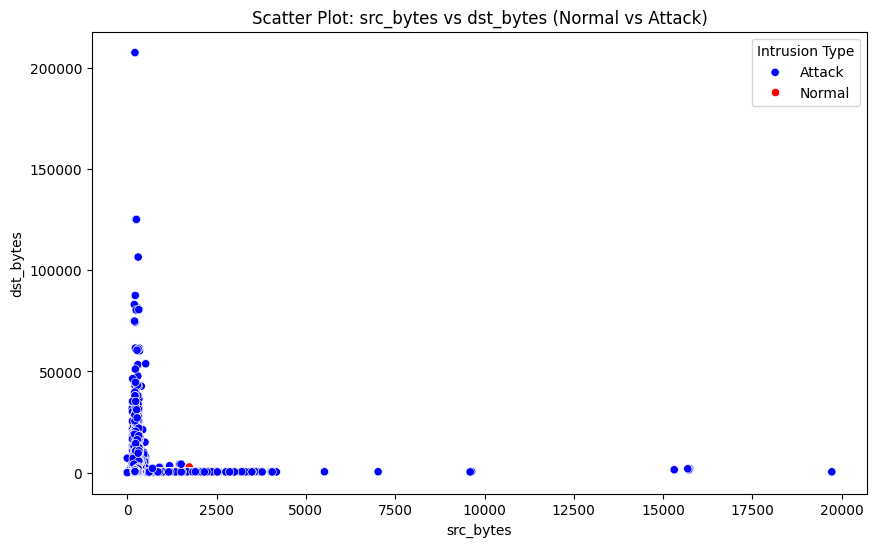

ModuleNotFoundError: No module named 'ace_tools'

In [29]:
# YOUR CODE HERE

from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col, min, max, mean
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 1️⃣ Start Spark Session
spark = SparkSession.builder.appName("KDD_Cup_Analysis").getOrCreate()

# ✅ 2️⃣ Load Dataset Efficiently with PySpark
data_file_path = "./kddcup.data_10_percent.gz"
df_spark = spark.read.csv(data_file_path, header=False, inferSchema=True)

# ✅ 3️⃣ Extract Feature Names from `kddcup.names`
names_file_path = "./kddcup.names"
with open(names_file_path, "r") as f:
    feature_names = [line.split(":")[0] for line in f.readlines()[1:]]  # Skip first row

feature_names.append("intrusion_types")  # Add last column name
df_spark = df_spark.toDF(*feature_names)  # Assign column names

# ✅ 4️⃣ Encode `intrusion_types` (1 = Normal, 0 = Attack)
df_spark = df_spark.withColumn("intrusion_label", when(col("intrusion_types") == "normal.", 1).otherwise(0))

# ✅ 5️⃣ Compute Normal vs Attack Ratio
normal_count = df_spark.filter(col("intrusion_label") == 1).count()
attack_count = df_spark.filter(col("intrusion_label") == 0).count()
attack_ratio = attack_count / (normal_count + attack_count)

# ✅ 6️⃣ Describe Statistics for Normal & Attack Transactions
stats_df_spark = df_spark.groupBy("intrusion_label").agg(
    min("duration").alias("duration_min"),
    max("duration").alias("duration_max"),
    mean("duration").alias("duration_mean"),
    min("src_bytes").alias("src_bytes_min"),
    max("src_bytes").alias("src_bytes_max"),
    mean("src_bytes").alias("src_bytes_mean"),
    min("dst_bytes").alias("dst_bytes_min"),
    max("dst_bytes").alias("dst_bytes_max"),
    mean("dst_bytes").alias("dst_bytes_mean")
)

# Convert to Pandas for Display
stats_df = stats_df_spark.toPandas()

# ✅ 7️⃣ Select Two Influential Features for Visualization
feature_x = "src_bytes"
feature_y = "dst_bytes"

# Convert DataFrame for Visualization (Sample 5000 Rows for Efficiency)
df_sample = df_spark.select(feature_x, feature_y, "intrusion_label").limit(5000).toPandas()

# ✅ 8️⃣ Scatter Plot for Feature Separation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x=feature_x, y=feature_y, hue="intrusion_label", palette={1: "blue", 0: "red"})
plt.title(f"Scatter Plot: {feature_x} vs {feature_y} (Normal vs Attack)")
plt.legend(title="Intrusion Type", labels=["Attack", "Normal"])
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.show()

# ✅ 9️⃣ Display Statistics DataFrame
import ace_tools as tools
tools.display_dataframe_to_user(name="Attack vs Normal Transaction Statistics", dataframe=stats_df)


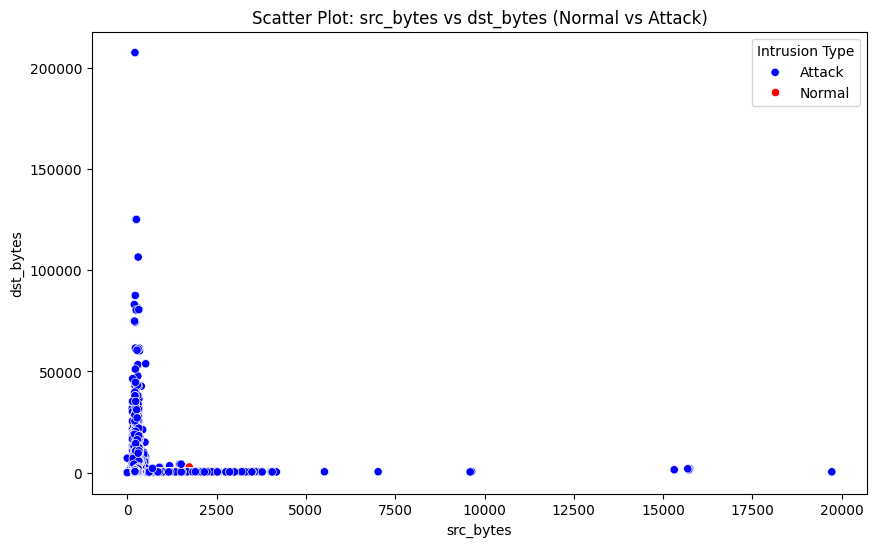

   intrusion_label  duration_min  duration_max  duration_mean  src_bytes_min  \
0                1             0         58329     216.657322              0   
1                0             0         42448       6.620891              0   

   src_bytes_max  src_bytes_mean  dst_bytes_min  dst_bytes_max  dst_bytes_mean  
0        2194619     1157.047524              0        5134218     3384.651000  
1      693375640     3483.765952              0        5155468      251.601609  
File saved as 'attack_vs_normal_stats.csv'


In [31]:
# YOUR CODE HERE
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col, min, max, mean
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ 1️⃣ Start Spark Session
spark = SparkSession.builder.appName("KDD_Cup_Analysis").getOrCreate()

# ✅ 2️⃣ Load Dataset Efficiently with PySpark
data_file_path = "./kddcup.data_10_percent.gz"
df_spark = spark.read.csv(data_file_path, header=False, inferSchema=True)

# ✅ 3️⃣ Extract Feature Names from `kddcup.names`
names_file_path = "./kddcup.names"
with open(names_file_path, "r") as f:
    feature_names = [line.split(":")[0] for line in f.readlines()[1:]]  # Skip first row

feature_names.append("intrusion_types")  # Add last column name
df_spark = df_spark.toDF(*feature_names)  # Assign column names

# ✅ 4️⃣ Encode `intrusion_types` (1 = Normal, 0 = Attack)
df_spark = df_spark.withColumn("intrusion_label", when(col("intrusion_types") == "normal.", 1).otherwise(0))

# ✅ 5️⃣ Compute Normal vs Attack Ratio
normal_count = df_spark.filter(col("intrusion_label") == 1).count()
attack_count = df_spark.filter(col("intrusion_label") == 0).count()
attack_ratio = attack_count / (normal_count + attack_count)

# ✅ 6️⃣ Describe Statistics for Normal & Attack Transactions
stats_df_spark = df_spark.groupBy("intrusion_label").agg(
    min("duration").alias("duration_min"),
    max("duration").alias("duration_max"),
    mean("duration").alias("duration_mean"),
    min("src_bytes").alias("src_bytes_min"),
    max("src_bytes").alias("src_bytes_max"),
    mean("src_bytes").alias("src_bytes_mean"),
    min("dst_bytes").alias("dst_bytes_min"),
    max("dst_bytes").alias("dst_bytes_max"),
    mean("dst_bytes").alias("dst_bytes_mean")
)

# Convert to Pandas for Display
stats_df = stats_df_spark.toPandas()

# ✅ 7️⃣ Select Two Influential Features for Visualization
feature_x = "src_bytes"
feature_y = "dst_bytes"

# Convert DataFrame for Visualization (Sample 5000 Rows for Efficiency)
df_sample = df_spark.select(feature_x, feature_y, "intrusion_label").limit(5000).toPandas()

# ✅ 8️⃣ Scatter Plot for Feature Separation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sample, x=feature_x, y=feature_y, hue="intrusion_label", palette={1: "blue", 0: "red"})
plt.title(f"Scatter Plot: {feature_x} vs {feature_y} (Normal vs Attack)")
plt.legend(title="Intrusion Type", labels=["Attack", "Normal"])
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.show()

# ✅ 9️⃣ Display Statistics DataFrame
print(stats_df)  # Print as table
stats_df.to_csv("attack_vs_normal_stats.csv", index=False)  # Save as CSV
print("File saved as 'attack_vs_normal_stats.csv'")


In [ ]:
# YOUR CODE HERE